In [2]:
#Solo si aún no se tiene
#!pip install tensorflow-datasets

                                              0.0/5.4 MB ? eta -:--:--
                                              0.1/5.4 MB 1.3 MB/s eta 0:00:05
     -                                        0.2/5.4 MB 2.4 MB/s eta 0:00:03
     ----                                     0.6/5.4 MB 3.9 MB/s eta 0:00:02
     --------                                 1.1/5.4 MB 5.9 MB/s eta 0:00:01
     ------------                             1.7/5.4 MB 7.2 MB/s eta 0:00:01
     ------------------                       2.5/5.4 MB 8.9 MB/s eta 0:00:01
     -----------------------                  3.1/5.4 MB 9.5 MB/s eta 0:00:01
     ------------------------------           4.1/5.4 MB 10.8 MB/s eta 0:00:01
     -------------------------------------    5.1/5.4 MB 12.0 MB/s eta 0:00:01
     ---------------------------------------- 5.4/5.4 MB 11.5 MB/s eta 0:00:00
                                              0.0/3.0 MB ? eta -:--:--
     ------------                             0.9/3.0 MB 19.8 MB/s eta 0:00

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Andres Rvs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [01:11<00:00, 69.23s/ url]

Dl Completed...: 100%|██████████| 1/1 [01:11<00:00, 69.23s/ url]

Extraction completed...: 100%|██████████| 4/4 [00:00<00:00,  8.46 file/s]


Dataset emnist downloaded and prepared to C:\Users\Andres Rvs\tensorflow_datasets\emnist\balanced\3.0.0. Subsequent calls will reuse this data.


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(47, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(img_train, label_train, validation_data=(img_test, label_test), epochs=15)

Epoch 1/15
3525/3525 [==============================] - 33s 9ms/step - loss: 0.9075 - accuracy: 0.7194 - val_loss: 0.4822 - val_accuracy: 0.8386
Epoch 2/15
3525/3525 [==============================] - 31s 9ms/step - loss: 0.5663 - accuracy: 0.8119 - val_loss: 0.4067 - val_accuracy: 0.8614
Epoch 3/15
3525/3525 [==============================] - 30s 9ms/step - loss: 0.5080 - accuracy: 0.8291 - val_loss: 0.3971 - val_accuracy: 0.8614
Epoch 4/15
3525/3525 [==============================] - 30s 8ms/step - loss: 0.4751 - accuracy: 0.8388 - val_loss: 0.3984 - val_accuracy: 0.8635
Epoch 5/15
3525/3525 [==============================] - 29s 8ms/step - loss: 0.4513 - accuracy: 0.8435 - val_loss: 0.3904 - val_accuracy: 0.8665
Epoch 6/15
3525/3525 [==============================] - 29s 8ms/step - loss: 0.4355 - accuracy: 0.8487 - val_loss: 0.3727 - val_accuracy: 0.8721
Epoch 7/15
3525/3525 [==============================] - 29s 8ms/step - loss: 0.4218 - accuracy: 0.8516 - val_loss: 0.3718 - val_ac

In [ ]:
!nvidia-smi

<function matplotlib.pyplot.show(close=None, block=None)>

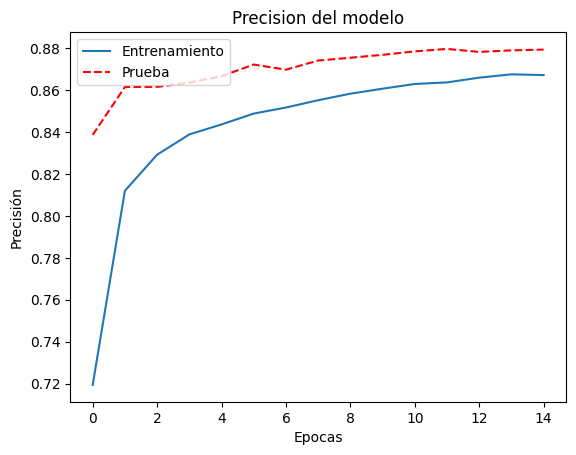

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precision del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

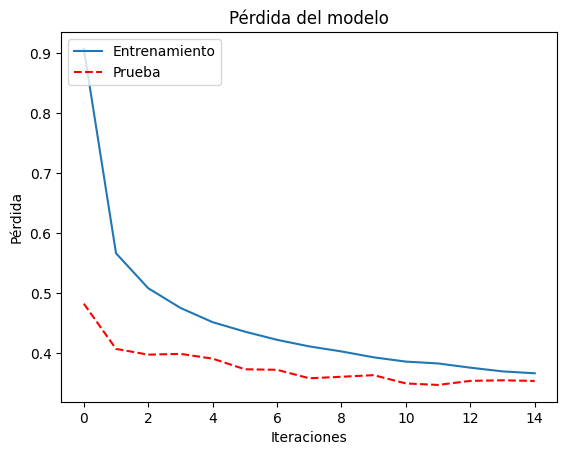

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Pérdida del modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show